In [1]:
from PIL import Image
import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt

import os
import os.path as osp

from tqdm import tqdm

In [2]:
data_path = '../DATA/VITON-HD/train'
subjects = os.listdir(osp.join(data_path, 'image'))

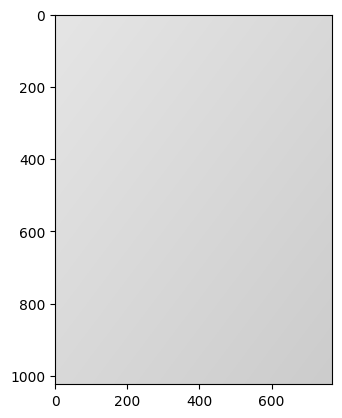

In [3]:
x = np.linspace(0.9, 0.8, 768)
y = np.linspace(0.9, 0.8, 1024)
X, Y = np.meshgrid(x, y)


bg = ((X + Y)/2 * 255).astype(np.uint8)
bg = np.stack([bg, bg, bg], axis=2)
plt.imshow(bg, cmap='gray')

### `gt_cloth_warped` w/ Fixed Background

In [5]:
os.makedirs(osp.join(data_path, 'gt_cloth_warped'), exist_ok=True)

for s in tqdm(subjects):
    image = cv.imread(osp.join(data_path, 'image', s))
    mask = cv.imread(osp.join(data_path, 'gt_cloth_warped_mask', s))

    mask = mask > 127

    warped_cloth = bg.copy()
    warped_cloth[mask] = image[mask]
    # warped_cloth = cv.cvtColor(warped_cloth, cv.COLOR_BGR2RGB)

    # plt.imshow(warped_cloth)

    cv.imwrite(osp.join(data_path, 'gt_cloth_warped', s), warped_cloth)

100%|██████████| 11647/11647 [01:46<00:00, 108.88it/s]


### `gt_cloth_warped` + `agn_mask`

In [19]:
os.makedirs(osp.join(data_path, 'gt_cloth_warped+agn_mask'), exist_ok=True)

for s in tqdm(subjects):
    warped_cloth = cv.imread(osp.join(data_path, 'gt_cloth_warped', s))
    agn_mask = cv.imread(osp.join(data_path, 'agnostic-mask', s.replace('.jpg', '_mask.jpg')))

    agn_mask = agn_mask > 127
    warped_cloth[agn_mask] = 127
    # warped_cloth = cv.cvtColor(warped_cloth, cv.COLOR_BGR2RGB)

    # plt.imshow(warped_cloth)

    cv.imwrite(osp.join(data_path, 'gt_cloth_warped+agn_mask', s), warped_cloth)

100%|██████████| 11647/11647 [01:38<00:00, 117.74it/s]


### `gt_cloth_warped` - `agn_mask`

In [7]:
os.makedirs(osp.join(data_path, 'gt_cloth_warped-agn_mask'), exist_ok=True)

for s in tqdm(subjects):
    warped_cloth = cv.imread(osp.join(data_path, 'gt_cloth_warped', s))
    agn_mask = cv.imread(osp.join(data_path, 'agnostic-mask', s.replace('.jpg', '_mask.jpg')))
    gt_mask = cv.imread(osp.join(data_path, 'gt_cloth_warped_mask', s))

    agn_mask = agn_mask > 127
    gt_mask = gt_mask > 127

    result = bg.copy()
    mask = gt_mask & ~agn_mask
    result[mask] = warped_cloth[mask]
    # warped_cloth = cv.cvtColor(warped_cloth, cv.COLOR_BGR2RGB)

    # plt.imshow(warped_cloth)

    cv.imwrite(osp.join(data_path, 'gt_cloth_warped-agn_mask', s), result)

100%|██████████| 11647/11647 [01:47<00:00, 108.31it/s]
